# Empirical Ortogonal Functions (EOF) Code

This code computes empirical orthogonal functions from the annual pattern of monthly data. It has been implemented under the guidance of professors Lars Gottschalk and Irina Krasovskaia in their visit to Bogota in october 2.015.

First, we have to load some packages that will be used in the code.

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


## 1. Read the data

You have to analyse the data in order to define the period of time to use.
Which periods we are going to use.


In [2]:
# xls_input = pd.ExcelFile('D:\WIN\Dropbox\Turbo_Pascal_Sources\data_input.xlsx')
xls_input = pd.ExcelFile('data_input.xlsx')
df_data = xls_input.parse('9x30', index_col='Date')
ix_data = df_data.columns
pd.options.display.float_format = '{:,.1f}'.format
print df_data.head(5).to_string()
# print df_data.to_string()

            21017050  21027010  21047010  26027090  26027100  26057040  44017050  21087070  21097070
Date                                                                                                
1983-01-01       8.6     138.5     183.6       2.6       6.8      15.4       3.7       9.0     361.1
1983-02-01      10.8     153.5     204.6       2.1       7.3       9.9       4.2       2.6     329.3
1983-03-01      11.6     165.4     219.7       4.1       8.9      10.3       4.4       6.4     432.3
1983-04-01       9.7     235.7     310.3       8.6      16.3      29.8       6.1      14.8     718.8
1983-05-01      16.7     249.7     321.2       3.9       6.5      33.1       8.1       9.9     661.4


## 2. Basic Statistics 

We calculate the Mean, Standard deviation, Coefficient of Variation, Coefficient of Skewness for each time series.

In [3]:
sr_mean = df_data.mean()
sr_std = df_data.std()
sr_cv = sr_std / sr_mean
sr_cs = df_data.skew()
pd.options.display.float_format = '{:,.3f}'.format
print 'Mean:\n', sr_mean.to_string()
print '\nStandard Deviation:\n', sr_std.to_string()
print '\nCoefficient of Variation:\n', sr_cv.to_string()
print '\nCoefficient of Skewness\n', sr_cs.to_string()

Mean:
21017050     7.936
21027010   154.443
21047010   216.704
26027090     4.382
26027100     8.053
26057040    21.811
44017050     7.350
21087070     9.616
21097070   490.962

Standard Deviation:
21017050     3.335
21027010    62.504
21047010    83.261
26027090     2.412
26027100     3.667
26057040    10.536
44017050     4.050
21087070     9.448
21097070   180.179

Coefficient of Variation:
21017050   0.420
21027010   0.405
21047010   0.384
26027090   0.550
26027100   0.455
26057040   0.483
44017050   0.551
21087070   0.983
21097070   0.367

Coefficient of Skewness
21017050   1.463
21027010   0.909
21047010   0.867
26027090   1.031
26027100   1.088
26057040   0.522
44017050   1.406
21087070   1.941
21097070   0.852


## 3. Centralise, Normalise and Standardise

Centralise is to subtract the mean value from the time series. Standardise is to divide the centralised value by the respective standard deviation.

**Centralised:**
$$
x = Q - m_Q
$$

**Normalised** (used for analysis of extreme values):
$$
x = \frac{Q}{m_Q}
$$

**Standardised:**
$$
x = \frac{Q - m_Q}{s_Q}
$$


In [4]:
df_central = df_data - sr_mean
df_standar = df_central / sr_std
pd.options.display.float_format = '{:,.3f}'.format
print 'Max. Values:\n', df_standar.max().to_string(),'\n\nMin. Values:\n', df_standar.min().to_string()

Max. Values:
21017050   4.565
21027010   3.898
21047010   3.802
26027090   3.963
26027100   4.802
26057040   3.338
44017050   4.511
21087070   5.002
21097070   4.335 

Min. Values:
21017050   -1.477
21027010   -1.886
21047010   -1.877
26027090   -1.631
26027100   -2.196
26057040   -1.844
44017050   -1.493
21087070   -0.968
21097070   -1.875


## 4. Calculate the Covariance Matrix 

In [5]:
df_cov_c = df_central.cov()
df_cov_s = df_standar.cov()
pd.options.display.float_format = '{:,.2f}'.format
print 'Covariance Matrix for Centralised Data:\n', df_cov_c.to_string()
print '\nCovariance Matrix for Standardised Data:\n', df_cov_s.to_string()

Covariance Matrix for Centralised Data:
          21017050  21027010  21047010  26027090  26027100  26057040  44017050  21087070  21097070
21017050     11.12    162.20    224.69      4.56      4.12      2.22      8.72     -1.97    366.77
21027010    162.20  3,906.74  5,119.53    122.66    125.11     73.74    216.42    -40.43  8,622.84
21047010    224.69  5,119.53  6,932.40    160.98    161.99     96.90    285.58    -42.34 11,785.93
26027090      4.56    122.66    160.98      5.82      7.21      6.09      7.29      3.41    340.90
26027100      4.12    125.11    161.99      7.21     13.44     17.23      6.53     18.34    503.43
26057040      2.22     73.74     96.90      6.09     17.23    111.01     -2.28     51.68    678.27
44017050      8.72    216.42    285.58      7.29      6.53     -2.28     16.40     -7.28    432.91
21087070     -1.97    -40.43    -42.34      3.41     18.34     51.68     -7.28     89.27    592.86
21097070    366.77  8,622.84 11,785.93    340.90    503.43    678.27 

## 5. Solve Eigenvalues and Eigenvectors problem for covariance matrix 

In [6]:
ix_ampfun = range(1, ix_data.size + 1)
pd.options.display.float_format = '{:,.3f}'.format

# For centralised data
df_results_c = pd.DataFrame(index=ix_ampfun, columns=['Eigenvalues', 'Cummulative_Variance', 'Relative_Variance'])
na_evalues_c, na_evectors_c = np.linalg.eig(df_cov_c)
df_results_c['Eigenvalues'] = pd.Series(na_evalues_c, index=ix_ampfun)
df_results_c['Cummulative_Variance'] = df_results_c['Eigenvalues'].cumsum()
df_results_c['Relative_Variance'] = df_results_c['Cummulative_Variance'] / df_results_c['Eigenvalues'].sum()
df_evectors_c = pd.DataFrame(na_evectors_c, index=ix_data, columns=ix_ampfun)
print 'Centralised:\n', df_results_c

# For standardised data
df_results_s = pd.DataFrame(index=ix_ampfun, columns=['Eigenvalues', 'Cummulative_Variance', 'Relative_Variance'])
na_evalues_s, na_evectors_s = np.linalg.eig(df_cov_s)
df_results_s['Eigenvalues'] = pd.Series(na_evalues_s, index=ix_ampfun)
df_results_s['Cummulative_Variance'] = df_results_s['Eigenvalues'].cumsum()
df_results_s['Relative_Variance'] = df_results_s['Cummulative_Variance'] / df_results_s['Eigenvalues'].sum()
df_evectors_s = pd.DataFrame(na_evectors_s, index=ix_data, columns=ix_ampfun)
print '\nStandardised:\n', df_results_s

Centralised:
   Eigenvalues  Cummulative_Variance  Relative_Variance
1   39,847.262            39,847.262              0.915
2    3,467.523            43,314.785              0.995
3      103.992            43,418.777              0.997
4       78.207            43,496.984              0.999
5       40.524            43,537.508              1.000
6        6.043            43,543.551              1.000
7        0.549            43,544.100              1.000
8        3.381            43,547.481              1.000
9        3.102            43,550.583              1.000

Standardised:
   Eigenvalues  Cummulative_Variance  Relative_Variance
1        5.346                 5.346              0.594
2        1.994                 7.340              0.816
3        0.589                 7.928              0.881
4        0.459                 8.387              0.932
5        0.221                 8.608              0.956
6        0.200                 8.808              0.979
7        0.013      

## 6. Calculate the Amplitude Functions (Principal Components)

It is calculated by multiplying the Eigenvectors Matrix with the Observations Matrix. Here, we have to check that the amplitude functions are not correlated.

In [7]:
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('chop_threshold', 0.)
# For centralised data
df_amplitude_c = pd.DataFrame(np.dot(df_central, na_evectors_c), index=df_data.index, columns=ix_ampfun)
print 'Centralised Data:'
print '\nCovariance of Amplitude Functions:\n', df_amplitude_c.cov()
print '\nAmplitude Functions:\n', df_amplitude_c.head(5)

# For standardised data
df_amplitude_s = pd.DataFrame(np.dot(df_standar, na_evectors_s), index=df_data.index, columns=ix_ampfun)
print '\nStandardised Data:'
print '\nCovariance of Amplitude Functions:\n', df_amplitude_s.cov()
print '\nAmplitude Functions:\n', df_amplitude_s.head(5)

Centralised Data:

Covariance of Amplitude Functions:
          1        2      3     4     5     6     7     8     9
1 39,847.26     0.00   0.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00
2      0.00 3,467.52   0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00
3      0.00     0.00 103.99  0.00  0.00 -0.00  0.00 -0.00  0.00
4     -0.00     0.00   0.00 78.21  0.00  0.00  0.00 -0.00  0.00
5     -0.00     0.00   0.00  0.00 40.52 -0.00 -0.00 -0.00  0.00
6      0.00    -0.00  -0.00  0.00 -0.00  6.04 -0.00  0.00 -0.00
7     -0.00    -0.00   0.00  0.00 -0.00 -0.00  0.55 -0.00 -0.00
8      0.00    -0.00  -0.00 -0.00 -0.00  0.00 -0.00  3.38 -0.00
9     -0.00     0.00   0.00  0.00  0.00 -0.00 -0.00 -0.00  3.10

Amplitude Functions:
                 1      2      3     4     5     6     7     8     9
Date                                                                
1983-01-01 -132.37 -26.15  -1.17 -5.57 -4.69  2.63 -0.57  0.57 -2.47
1983-02-01 -149.33 -64.15   2.80 -5.40 -3.94  2.59 -1.63  1.70 -4.24
1983-03-

## 7. Print and Plot the Eigenvectors and Amplitude Functions

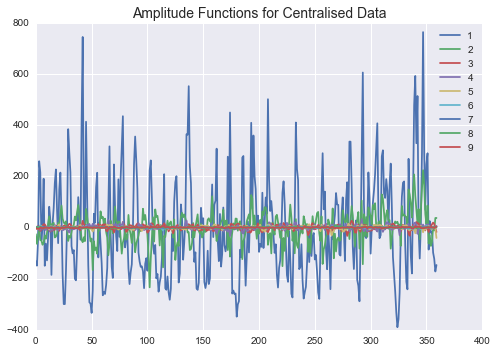

In [8]:
#For the centralised data
what_af_plot = df_amplitude_c.columns
legend = []
for wp in what_af_plot:
    plt.plot(df_amplitude_c[wp])
    legend += [str(wp)]
plt.title('Amplitude Functions for Centralised Data', size=14)
plt.legend(legend)
plt.show()

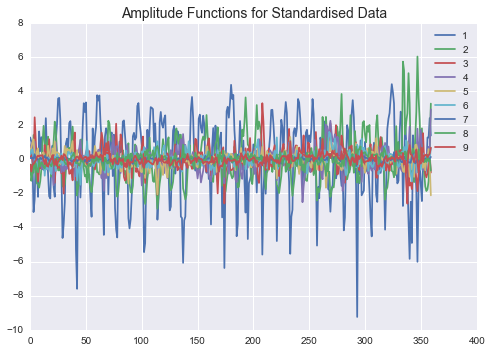

In [9]:
#For the standardised data
what_af_plot = df_amplitude_s.columns
legend = []
for wp in what_af_plot:
    plt.plot(df_amplitude_s[wp])
    legend += [str(wp)]
plt.title('Amplitude Functions for Standardised Data', size=14)
plt.legend(legend)
plt.show()

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


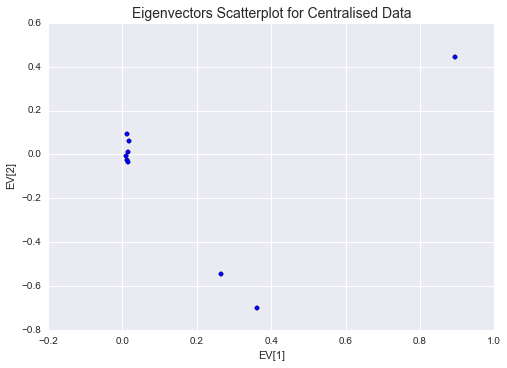

In [10]:
#For the centralised data
what_ev_plot = [1, 2]

plt.scatter(df_evectors_c[what_ev_plot[0]], df_evectors_c[what_ev_plot[1]])
plt.xlabel('EV[' + str(what_ev_plot[0]) + ']')
plt.ylabel('EV[' + str(what_ev_plot[1]) + ']')
plt.title('Eigenvectors Scatterplot for Centralised Data', size=14)
plt.show()

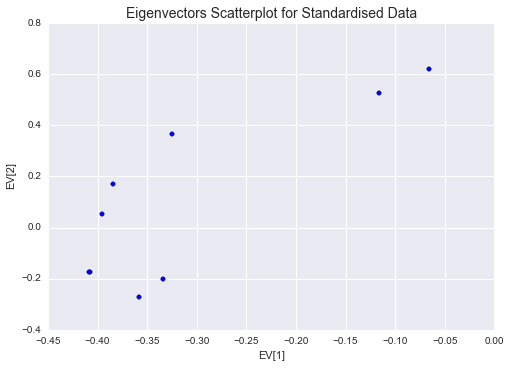

In [11]:
#For the standardised data
what_ev_plot = [1, 2]

plt.scatter(df_evectors_s[what_ev_plot[0]], df_evectors_s[what_ev_plot[1]])
plt.xlabel('EV[' + str(what_ev_plot[0]) + ']')
plt.ylabel('EV[' + str(what_ev_plot[1]) + ']')
plt.title('Eigenvectors Scatterplot for Standardised Data', size=14)
plt.show()

## 8. Calculate explained variance by each component for each station

$$
\text{Var}[Q(t, w)] = \frac{1}{\sigma_{Q}^{2}}\sum_{k=1}^{n}{\beta_{k}^{2}(w)\lambda_k}
$$
where $\beta$ are the eigenvectors and $\lambda$ are the eigenvalues.

          0     1     2     3     4     5     6     7     8     9
21017050  0 0.461 0.181 0.003 0.026 0.000 0.063 0.000 0.254 0.012
21027010  0 0.722 0.265 0.002 0.011 0.000 0.000 0.000 0.000 0.000
21047010  0 0.751 0.245 0.000 0.004 0.000 0.000 0.000 0.000 0.000
26027090  0 0.676 0.038 0.010 0.011 0.002 0.161 0.075 0.004 0.023
26027100  0 0.549 0.042 0.074 0.010 0.041 0.195 0.008 0.004 0.076
26057040  0 0.099 0.109 0.671 0.039 0.081 0.000 0.000 0.000 0.000
44017050  0 0.459 0.285 0.009 0.008 0.000 0.102 0.000 0.028 0.109
21087070  0 0.072 0.346 0.208 0.029 0.345 0.001 0.000 0.000 0.000
21097070  0 0.979 0.021 0.000 0.000 0.000 0.000 0.000 0.000 0.000


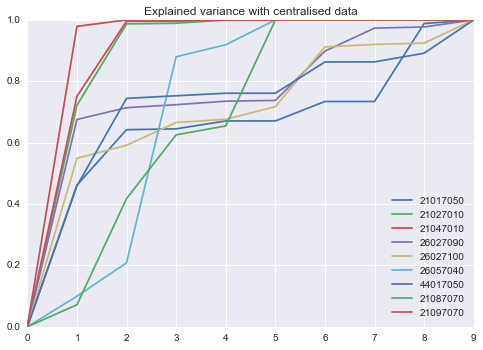

In [12]:
pd.options.display.float_format = '{:,.3f}'.format
#print df_evectors_c
#print na_evalues_c
#print sr_std
df_varexp_c = pd.DataFrame(index=ix_data, columns=range(ix_data.size + 1))

for st in ix_data:
    # print st
    for i in range(ix_data.size):
        #print (df_evectors_c.loc[st, i + 1])
        #print sr_std[st] ** 2
        df_varexp_c.loc[st, i + 1] = (((df_evectors_c.loc[st, i + 1] ** 2) * na_evalues_c[i]) / (sr_std[st] ** 2))


df_varexp_c[0] = 0
print df_varexp_c
df_varexp_c.T.cumsum().plot(ylim=[0, 1], title='Explained variance with centralised data')

          0     1     2     3     4     5     6     7     8     9
21017050  0 0.595 0.081 0.136 0.119 0.015 0.049 0.000 0.005 0.000
21027010  0 0.887 0.060 0.005 0.000 0.004 0.007 0.006 0.028 0.004
21047010  0 0.892 0.059 0.010 0.001 0.002 0.010 0.007 0.018 0.001
26027090  0 0.837 0.005 0.059 0.034 0.011 0.014 0.000 0.004 0.035
26027100  0 0.564 0.264 0.101 0.006 0.022 0.017 0.000 0.001 0.026
26057040  0 0.072 0.549 0.255 0.122 0.001 0.000 0.000 0.000 0.000
44017050  0 0.686 0.148 0.013 0.020 0.100 0.005 0.000 0.028 0.000
21087070  0 0.023 0.770 0.010 0.141 0.051 0.001 0.000 0.003 0.001
21097070  0 0.790 0.058 0.000 0.015 0.015 0.097 0.000 0.023 0.001


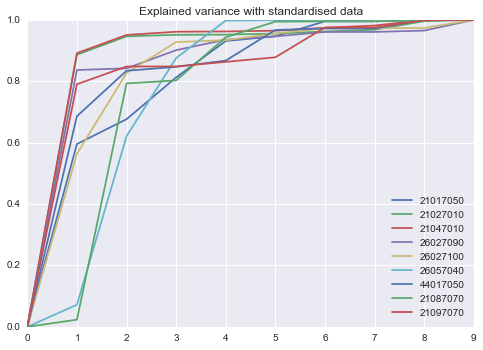

In [13]:
pd.options.display.float_format = '{:,.3f}'.format
#print df_evectors_c
#print na_evalues_c
#print sr_std
df_varexp_s = pd.DataFrame(index=ix_data, columns=range(ix_data.size + 1))

for st in ix_data:
    # print st
    for i in range(ix_data.size):
        #print (df_evectors_c.loc[st, i + 1])
        #print sr_std[st] ** 2
        df_varexp_s.loc[st, i + 1] = (((df_evectors_s.loc[st, i + 1] ** 2) * na_evalues_s[i]))
df_varexp_s[0] = 0
print df_varexp_s
df_varexp_s.T.cumsum().plot(ylim=[0, 1], title='Explained variance with standardised data')

## 9. Recalculate the original data

We should inverse the eigenvectors matrix **$A$** and then multiply this matrix with the amplitude functions **$\Psi$**.

$$
\Psi = AX
$$

$$
A^{-1}\Psi = X
$$

Then, we could get easily the original data only by solving the applied equation in order to centralise or standardise the data.

In [14]:
pd.options.display.float_format = '{:,.1f}'.format
df_data_c = pd.DataFrame(np.dot(df_amplitude_c, df_evectors_c.T), index=df_data.index, columns=ix_data) + sr_mean
print 'Reconstructed data from centralised values:\n', df_data_c.head(5)
df_data_s = pd.DataFrame(np.dot(df_amplitude_s, df_evectors_s.T), index=df_data.index, columns=ix_data) * sr_std + sr_mean
print '\nReconstructed data from standardised values:\n', df_data_s.head(5)

Reconstructed data from centralised values:
            21017050  21027010  21047010  26027090  26027100  26057040  \
Date                                                                     
1983-01-01       8.6     138.5     183.6       2.6       6.8      15.4   
1983-02-01      10.8     153.5     204.6       2.1       7.3       9.9   
1983-03-01      11.6     165.4     219.7       4.1       8.9      10.3   
1983-04-01       9.7     235.7     310.3       8.6      16.3      29.8   
1983-05-01      16.7     249.7     321.2       3.9       6.5      33.2   

            44017050  21087070  21097070  
Date                                      
1983-01-01       3.7       9.0     361.1  
1983-02-01       4.2       2.6     329.3  
1983-03-01       4.4       6.4     432.3  
1983-04-01       6.1      14.8     718.8  
1983-05-01       8.1       9.9     661.4  

Reconstructed data from standardised values:
            21017050  21027010  21047010  26027090  26027100  26057040  \
Date            

# Application for filling in gaps

For centralised data, we use next equation:

$$
\beta_{k}(\omega) = \frac{\sigma(\omega)\text{ }\rho(Q(\omega, t),\Psi_{k}(t))}{\sqrt{\lambda_{k}}}
$$

For standardised data, we use next equation:
$$
\beta_{k}(\omega) = \frac{\rho(Q(\omega, t),\Psi_{k}(t))}{\sqrt{\lambda_{k}}}
$$

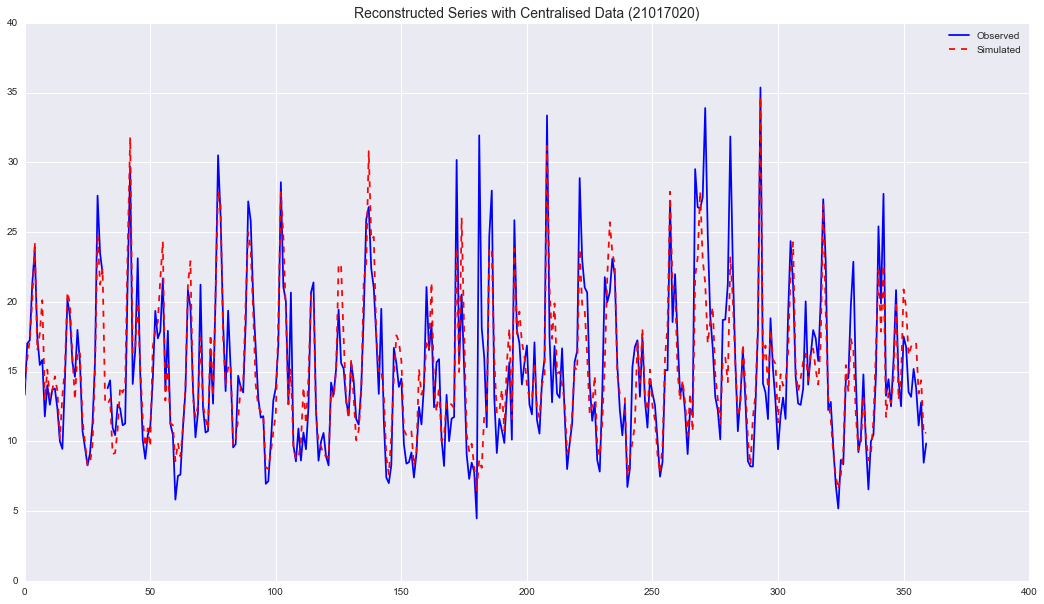

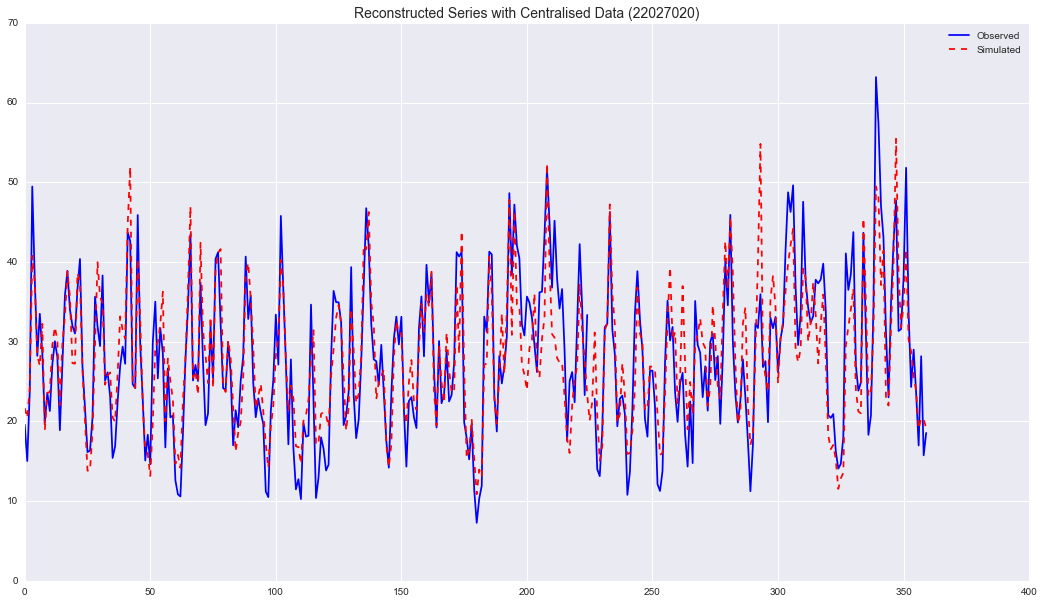

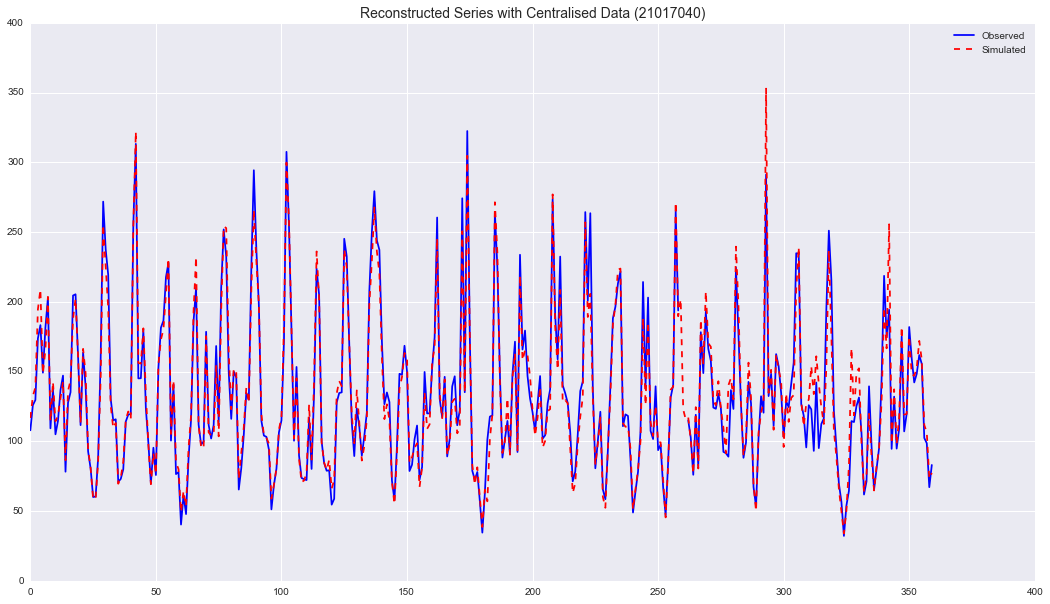

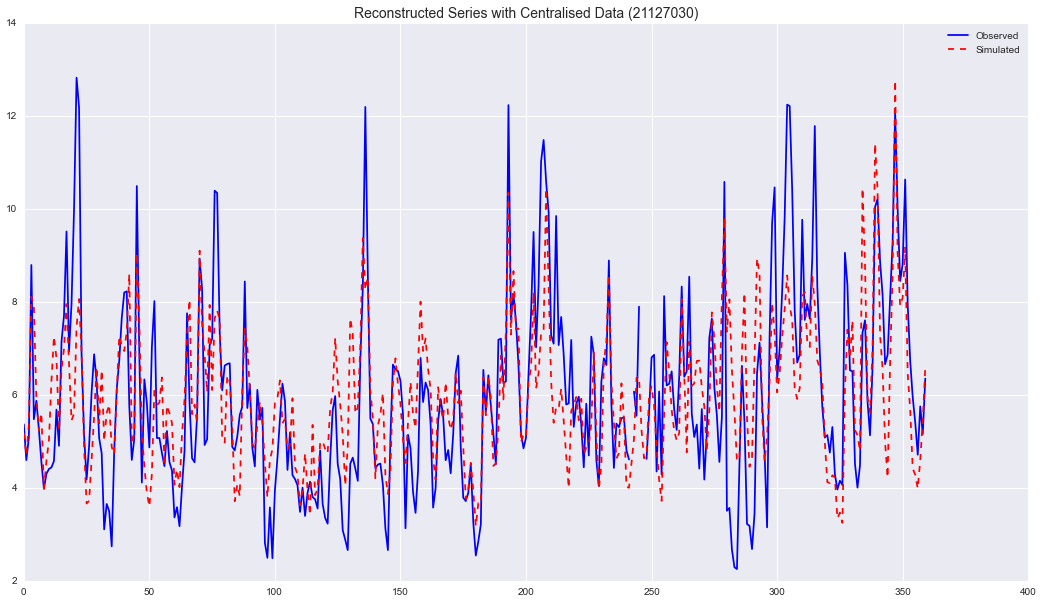

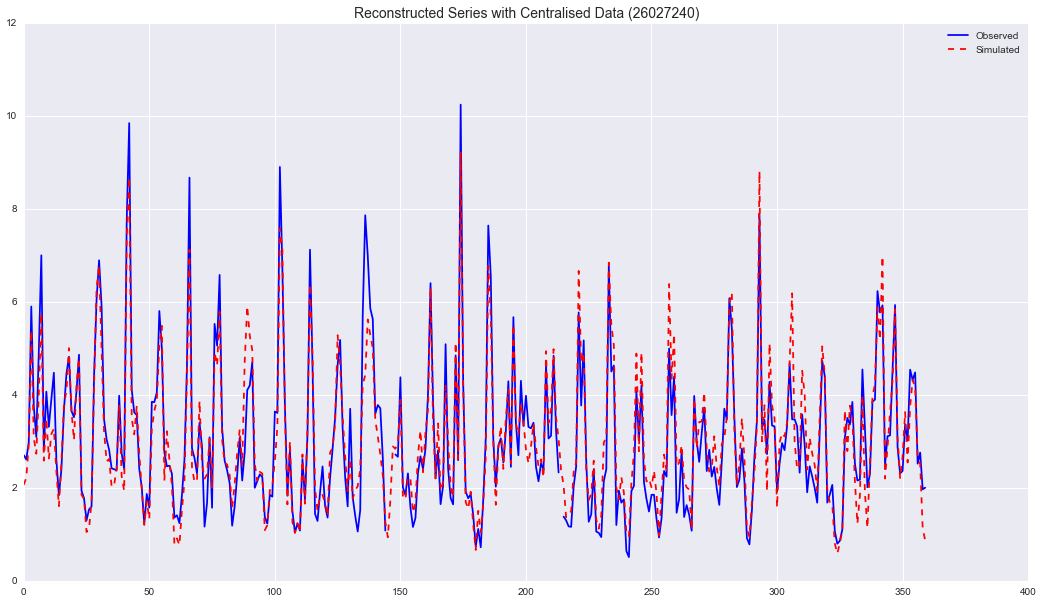

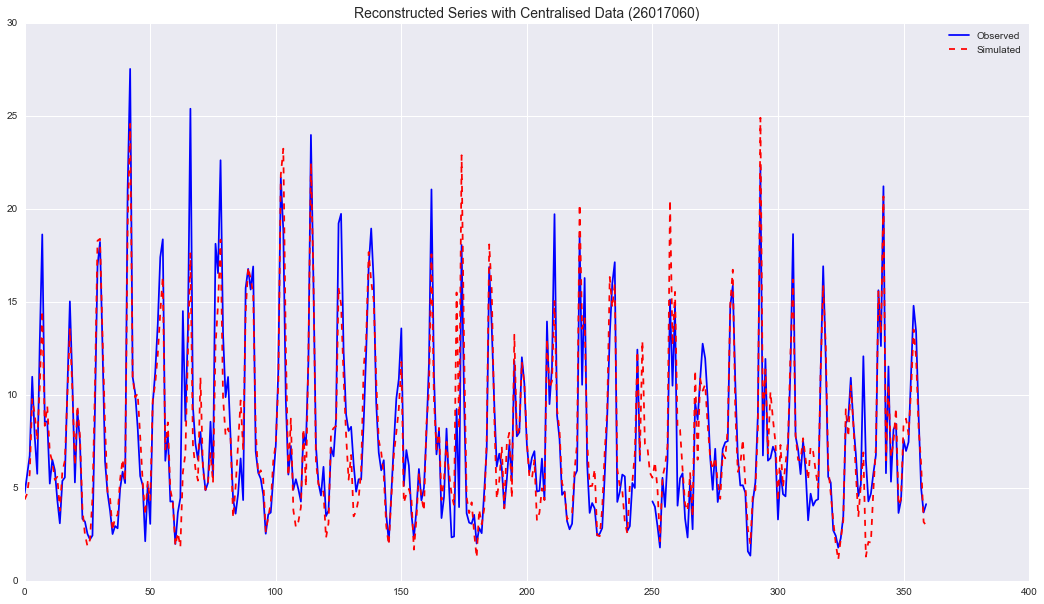

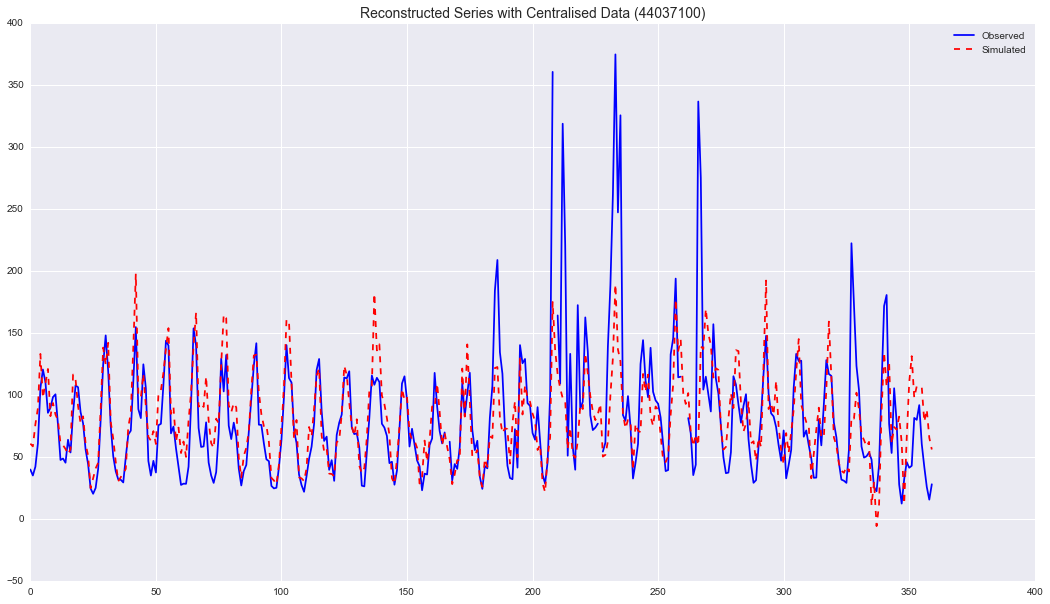

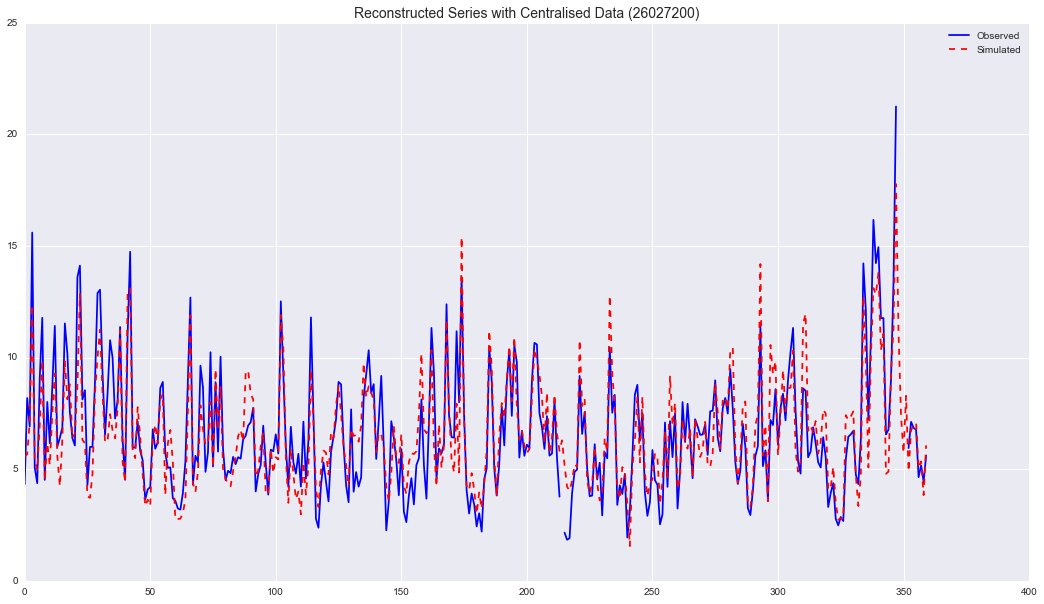

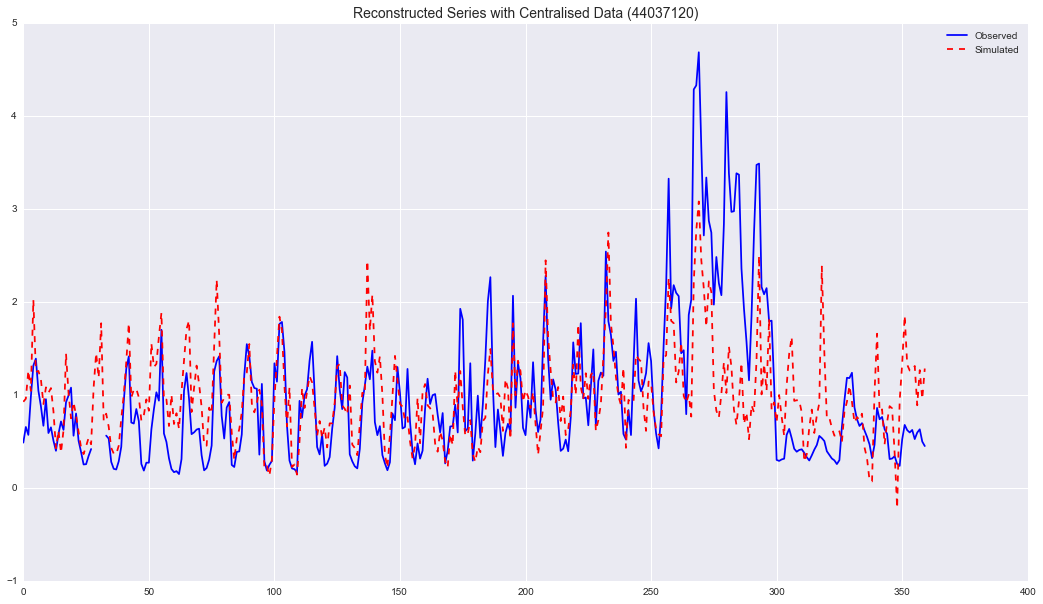

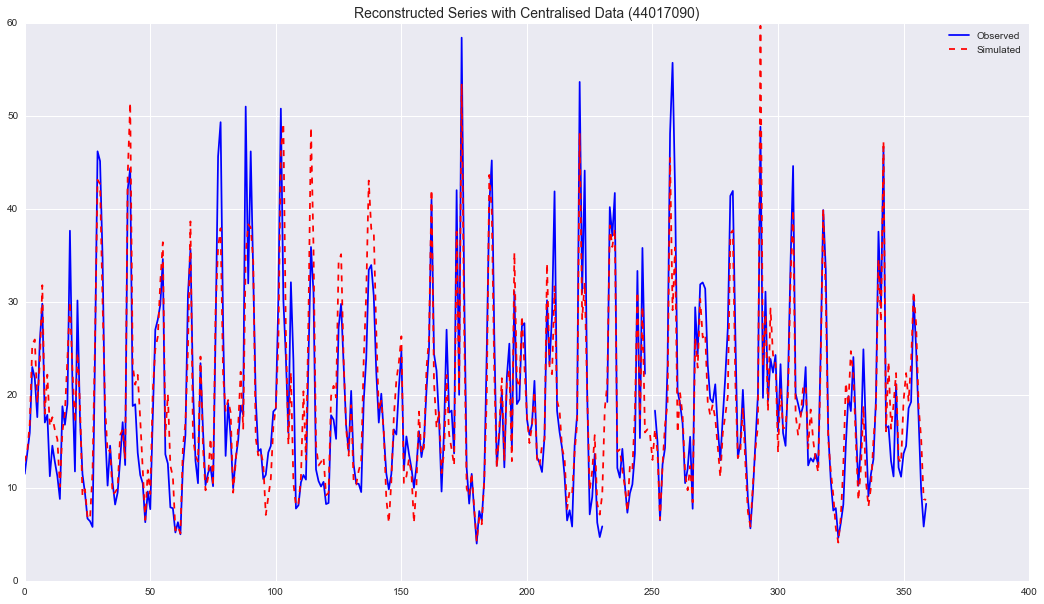

Explained variance for reconstructed series (Centralised)
          0     1     2     3     4     5     6     7     8     9
21017020  0 0.541 0.737 0.737 0.738 0.739 0.744 0.745 0.772 0.774
22027020  0 0.663 0.663 0.728 0.735 0.746 0.751 0.752 0.753 0.755
21017040  0 0.647 0.940 0.941 0.946 0.946 0.948 0.948 0.948 0.950
21127030  0 0.325 0.378 0.474 0.508 0.508 0.513 0.513 0.513 0.518
26027240  0 0.615 0.757 0.759 0.769 0.769 0.856 0.867 0.868 0.874
26017060  0 0.479 0.779 0.801 0.803 0.803 0.845 0.853 0.853 0.877
44037100  0 0.195 0.344 0.347 0.363 0.375 0.381 0.427 0.437 0.438
26027200  0 0.522 0.524 0.542 0.550 0.586 0.722 0.722 0.723 0.779
44037120  0 0.086 0.206 0.208 0.225 0.226 0.239 0.300 0.383 0.384
44017090  0 0.508 0.760 0.764 0.786 0.787 0.827 0.834 0.842 0.857

Explained variance for reconstructed series (Standardised)
          0     1     2     3     4     5     6     7     8     9
21017020  0 0.541 0.737 0.737 0.738 0.739 0.744 0.745 0.772 0.774
22027020  0 0.663 0.663 

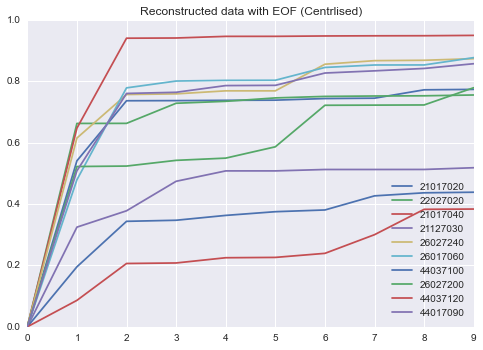

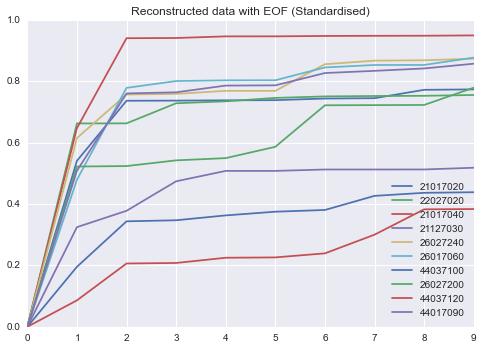

In [15]:
pd.options.display.float_format = '{:,.3f}'.format
ew_output = pd.ExcelWriter('data_output.xlsx')
df_gaps = xls_input.parse('Gaps_30', index_col='Date').loc[df_data.index]
ix_gaps = df_gaps.columns
sr_mean_gaps = df_gaps.mean()
sr_std_gaps = df_gaps.std()
df_fill_c = pd.DataFrame(index=df_data.index, columns=ix_gaps)
df_fill_s = pd.DataFrame(index=df_data.index, columns=ix_gaps)

df_varexp_gaps_c = pd.DataFrame(index=ix_gaps, columns=range(ix_data.size + 1))
df_varexp_gaps_c[0] = 0
df_varexp_gaps_s = pd.DataFrame(index=ix_gaps, columns=range(ix_data.size + 1))
df_varexp_gaps_s[0] = 0


for st_gap in ix_gaps:
    sr_corr = df_amplitude_c.corrwith(df_gaps[st_gap], drop=True)
    sr_evector_gap_c = sr_std_gaps[st_gap] * sr_corr / df_results_c['Eigenvalues'] ** .5
    df_fill_c[st_gap] = pd.Series(np.dot(df_amplitude_c, sr_evector_gap_c), index=df_gaps.index) + sr_mean_gaps[st_gap]
    plt.figure(figsize=(18, 10))
    plt.plot(df_gaps[st_gap], '-b')
    plt.plot(df_fill_c[st_gap], '--r')
    plt.title('Reconstructed Series with Centralised Data (' + str(st_gap) + ')', size=14)
    plt.legend(['Observed', 'Simulated'])
    #plt.savefig('D:\WIN\Dropbox\Turbo_Pascal_Sources\sim_obs.jpg', dpi=300)
    plt.show()
    
    sr_evector_gap_s = sr_corr / df_results_s['Eigenvalues'] ** .5
    df_fill_s[st_gap] = pd.Series(np.dot(df_amplitude_s, sr_evector_gap_s), index=df_gaps.index) * sr_std_gaps[st_gap] + sr_mean_gaps[st_gap]
    #plt.figure(figsize=(18, 10))
    #plt.plot(df_gaps[st_gap], '-b')
    #plt.plot(df_fill_s[st_gap], '--r')
    #plt.title('Reconstructed Series with Standardised Data (' + str(st_gap) + ')' , size=14)
    #plt.legend(['Observed', 'Simulated'])
    #plt.savefig('D:\WIN\Dropbox\Turbo_Pascal_Sources\sim_obs.jpg', dpi=300)
    #plt.show()
    
    for i in range(ix_data.size):
        df_varexp_gaps_c.loc[st_gap, i + 1] = ((sr_evector_gap_c[i + 1] ** 2) * na_evalues_c[i]) / (sr_std_gaps[st_gap] ** 2)
        df_varexp_gaps_s.loc[st_gap, i + 1] = ((sr_evector_gap_s[i + 1] ** 2) * na_evalues_s[i])
    
df_varcum_gaps_c = df_varexp_gaps_c.cumsum(axis=1)
df_varcum_gaps_s = df_varexp_gaps_s.cumsum(axis=1)

df_fill_c.to_excel(ew_output, 'reconstructed', merge_cells=False)
df_fill_c[pd.isnull(df_gaps)].to_excel(ew_output, 'filled', merge_cells=False)
ew_output.save()
print 'Explained variance for reconstructed series (Centralised)\n', df_varcum_gaps_c
print '\nExplained variance for reconstructed series (Standardised)\n', df_varcum_gaps_s

df_varcum_gaps_c.T.plot(ylim=[0, 1], title='Reconstructed data with EOF (Centrlised)')
df_varcum_gaps_s.T.plot(ylim=[0, 1], title='Reconstructed data with EOF (Standardised)')